In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut
from sklearn import linear_model
%matplotlib inline

In [2]:
data = pd.read_csv('Cars93.csv')

In [3]:
Y = np.array(data['Price'].values.reshape(-1,1))
X = np.array(data[['MPG.city', 'MPG.highway', 'EngineSize','Horsepower','RPM','Rev.per.mile','Fuel.tank.capacity','Passengers', 'Length','Wheelbase','Width','Turn.circle','Weight']])

In [4]:
def mse(y_a, y_b):
    d = (y_a - y_b)**2
    return d.mean()

def cross_validation(X, Y, alph):
    
    loo = LeaveOneOut()
    n_points = loo.get_n_splits(X)
    mse_groups = np.zeros(n_points)
    i=0;
    for train_index, test_index in loo.split(X):
        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test = Y[train_index], Y[test_index]
        
        lazaro = linear_model.Lasso(alpha=alph, normalize=True)
        lazaro.fit(X_train,Y_train)
        params = lazaro.get_params()
        
        Y_pred = lazaro.predict(X_test)
        mse_groups[i] = mse(Y_test, Y_pred)
        i += 1
    
    return mse_groups.mean()

In [5]:
N = 1000
alph = np.linspace(0.001, 0.9, num=N, endpoint=True)
params = np.zeros((len(alph),13))
val_error = np.zeros(N)
for i in range(0,N):
    lazaro = linear_model.Lasso(alpha=alph[i],normalize=True)
    lazaro.fit(X,Y)
    params[i,:] =lazaro.coef_
    val_error[i] = cross_validation(X, Y, alph[i])

Text(0, 0.5, 'Standarized Coefficients')

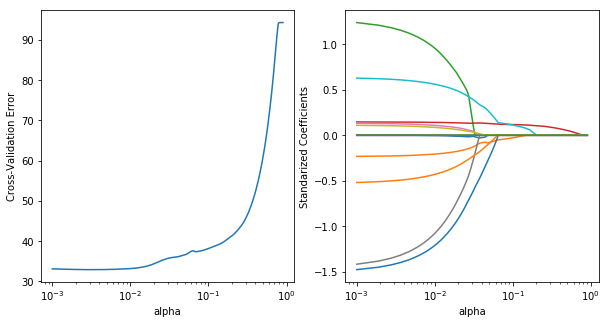

In [6]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(alph,val_error)
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Cross-Validation Error')

plt.subplot(1,2,2)
plt.plot(alph, params)
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Standarized Coefficients')